In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
from matplotlib import ticker

In [9]:
def draw(grid):
  col_dict = {0:"grey", #EmptyGround
              1:"Green", #Tree
              2:"red",#fire
              3:"black" #ash
              }

  cm = colors.ListedColormap([col_dict[x] for x in col_dict.keys()])
  norm_bins = np.sort([*col_dict.keys()]) + 0.5
  norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)

  len_lab = 4  #4 pixel states
  norm = colors.BoundaryNorm(norm_bins, len_lab, clip=True)

  plt.figure(figsize=(3,3))
  plt.pcolor(grid[::-1],cmap=cm, norm=norm ,edgecolors='k')
  plt.show()

In [10]:
size=10

def make_grid(size=10):
  grid = np.zeros((size,size))

  for i in range(size):
    for j in range(size):
      grid[i][j] = np.random.randint(2)
    
  return grid

# def check(grid): 
#   size = len(grid[0])
#   test = np.ones(size)


In [ ]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

In [11]:
class Grid:
  def __init__(self,size):
    self.size = size
    self.grid = np.zeros((size,size))
    self.grow_trees()

    #Dictionary for colormap.
    self.col_dict = {0:"grey", #EmptyGround
            1:"Green", #Tree
            2:"red",#fire
            3:"black" #ash
            }
    
  def grow_trees(self):
    for i in range(self.size):
      for j in range(self.size):
        if self.grid[i,j] == 0:
          if np.random.randint(0,1)==0:
            self.grid[i,j] = 1
  
  def start_fire(self,x,y):
    self.grid[x,y] = 2

  def draw(self):
    cm = colors.ListedColormap([self.col_dict[x] for x in self.col_dict.keys()])

    norm_bins = np.sort([*self.col_dict.keys()]) + 0.5
    norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
    
    len_lab = 4  #4 pixel states
    norm = colors.BoundaryNorm(norm_bins, len_lab, clip=True)

    plt.figure(figsize=(10,10))
    plt.pcolor(self.grid[::-1],cmap=cm, norm=norm ,edgecolors='k')
    plt.show()


In [17]:
class Simulate:
  def __init__(self,fire_x, fire_y,size=100):
    self.grids = [] #Holds the grids
    self.size = size
    self.current_frame = 0

    self.first_grid()
    self.start_fire(0,fire_x,fire_y)

  def first_grid(self):
    first = Grid(self.size)
    self.grids.append(first)

  def start_fire(self, frame, x, y):
    self.grids[frame].start_fire(x,y)

  def draw_next(self):
    self.grids[self.current_frame].draw()

  def evolve(self):
    #Create the next grid and assign it the current 2D array for the previous one
    current_grid = self.grids[self.current_frame].grid
    next_grid = Grid(self.size)
    next_grid.grid = np.copy(self.grids[self.current_frame].grid)
    self.current_frame += 1

    #next_grid.grow_trees()

    #Append to grid list
    self.grids.append(next_grid)
    k = [-1,1]
    for i in range(self.size):
      for j in range(self.size):
          if current_grid[i,j] == 2:
            for x in k:
              try:
                if current_grid[i+x,j] ==1:
                  
                  if np.random.randint(0,5) == 0: 
                    next_grid.grid[i+x,j] = 2

              except IndexError:
                pass

              try:
                  if current_grid[i,j+x] == 1:
                    if np.random.randint(0,5) == 0: 
                      next_grid.grid[i,j+x] = 2
              except IndexError:
                pass

              try:
                  if current_grid[i+x,j+x] == 1:
                    if np.random.randint(0,5) == 0: 
                      next_grid.grid[i+x,j+x] = 2
              except IndexError:
                pass

              try:
                  if current_grid[i-x,j+x] == 1:
                    if np.random.randint(0,5) == 0: 
                      next_grid.grid[i-x,j+x] = 2
              except IndexError:
                pass

          if np.random.randint(0,20) == 0:     
            if current_grid[i,j] == 2:
              for x in k:
                try:
                  if current_grid[i+x,j] ==3:
                    next_grid.grid[i+x,j] = 1
                except IndexError:
                  pass
                try:
                    if current_grid[i,j+x] == 1:
                      next_grid.grid[i,j+x] = 2
                except IndexError:
                  pass
                try:
                    if current_grid[i+x,j+x] == 1:
                      next_grid.grid[i+x,j+x] = 2
                except IndexError:
                  pass
                try:
                    if current_grid[i-x,j+x] == 1:
                      next_grid.grid[i-x,j+x] = 2
                except IndexError:
                  pass

          if current_grid[i,j] == 2:
            if np.random.randint(0,2)==0:
              next_grid.grid[i,j] = 3

          if current_grid[i,j] == 3:
            if np.random.randint(0,200)==0:
              next_grid.grid[i,j] = 0

          # if current_grid[i,j] == 0:
          #   if np.random.randint(0,50)==0:
          #     next_grid.grid[i,j] = 1

                
            # if np.random.randint(0,2) == 0: #1/2 chance
            #   next_grid[i,j] = 2


In [19]:
sim = Simulate(50,50)
sim.draw_next()

for i in range(100):
  sim.evolve()
  sim.draw_next()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def create_empty_grid(size=100):
    return np.zeros((size,size))

In [ ]:
def create_forest(data,size=100):
  for i in range(size):
    for j in range(size):
      data[i,j] = np.random.randint(0,2)

In [ ]:
def plot(data):
  col_dict = {0:"grey", #EmptyGround
            1:"Green", #Tree
            2:"red",#fire
            3:"black" #ash
            }

  cm = colors.ListedColormap([col_dict[x] for x in col_dict.keys()])

  norm_bins = np.sort([*col_dict.keys()]) + 0.5
  norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
                        
  len_lab = 4 #4 pixel states
  norm = colors.BoundaryNorm(norm_bins, len_lab, clip=True)

  plt.figure(figsize=(10,10))
  plt.pcolor(data[::-1],cmap=cm, norm=norm ,edgecolors='k')
  plt.show()

In [ ]:
def regrow_trees(data,size=100):
  for i in range(size):
    for j in range(size):
      if data[i,j] == 0:
        if np.random.randint(0,3) == 0: #1/3 chance
          data[i,j] = 1
      if data[i,j] == 4:
        if np.random.randint(0,6)== 0:
          data[i,j] = 1  

In [ ]:
def fire_tick(data,size=100):
  for i in range(size-2):
    for j in range(size-2):
      for k in [-1,1]:
        if data[1+i+k,j] or data[i,1+j+k] == 2:
          if np.random.randint(0,2) == 0: #1/2 chance
            data[i,j] = 2
      if data[i,j] == 2:
        if np.random.randint(0,4) == 0: #1/4 chance
          data[i,j] = 3
       
        

        

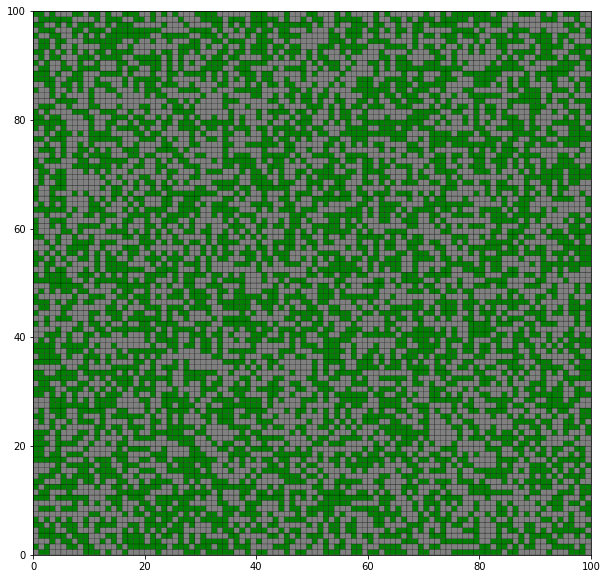

In [ ]:
grid1 = create_empty_grid()
create_forest(grid1)
plot(grid1)

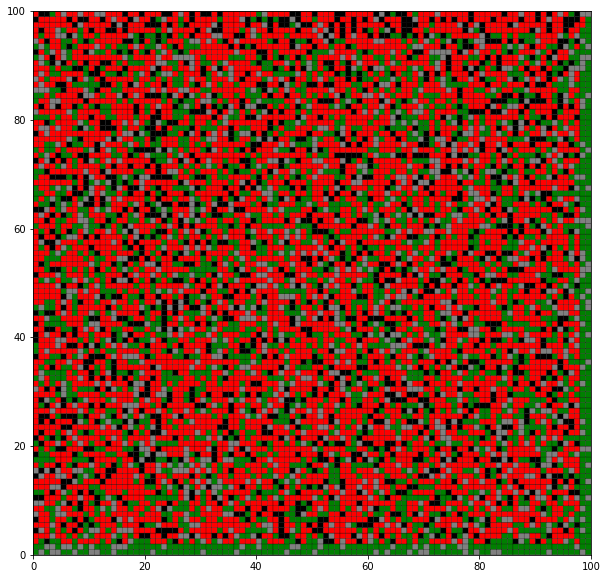

In [ ]:
grid1
plot(grid1)

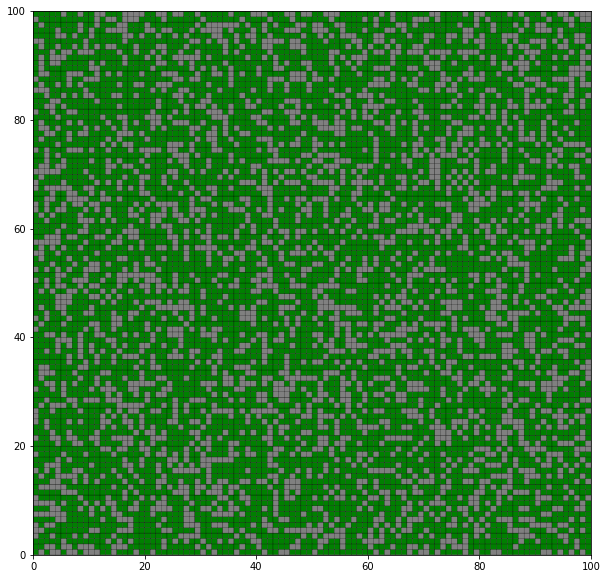

In [ ]:
grid2 = grid1
regrow_trees(grid2)
plot(grid2)

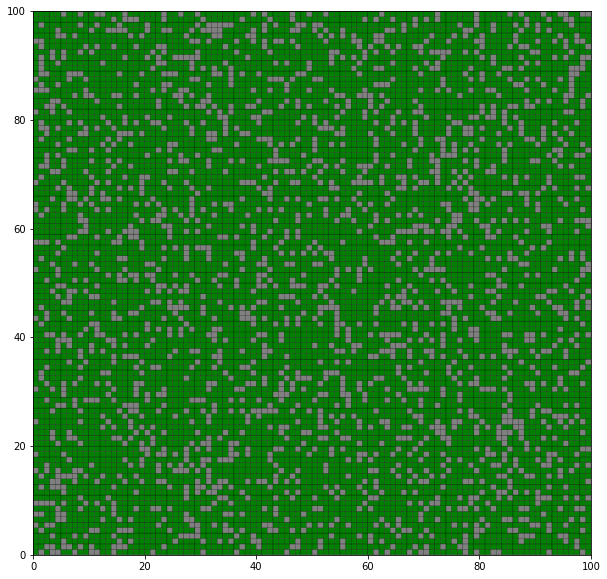

In [ ]:
grid3 = grid2
regrow_trees(grid3)
plot(grid3)

In [ ]:
grid4 = grid3
fire_tick(grid4)
plot(grid4)

IndexError: ignored

## Notes and Old Code

In [ ]:
col_dict = {0:"grey", #EmptyGround
            1:"Green", #Tree
            2:"red",#fire
            3:"black" #ash
            }
cm = colors.ListedColormap([col_dict[x] for x in col_dict.keys()])
labels = np.array(["Ground","Tree","Fire","Ash"])
len_lab = len(labels)

norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
print(norm_bins)
## Make normalizer and formatter
norm = colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig,ax = plt.subplots()
im = ax.imshow(grid1, cmap=cm, norm=norm)

#diff = norm_bins[1:] - norm_bins[:-1]
# tickz = norm_bins[:-1] + diff / 2
#cb = fig.colorbar(im, format=fmt, ticks=tickz)
# fig.savefig("example_landuse.png")
plt.show()
